In [1]:
%load_ext autoreload
%autoreload 2
import os
from utils_folding import SimulationParticles
import matplotlib.pyplot as plt
plt.style.use('niceplot2jay.mplstyle')

SNAPSHOT = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind0_gmc9/snapshot_550.hdf5'
simParticles = SimulationParticles.load_snapshot(SNAPSHOT)

## Interpolation: Histogram + ANN
To first use histogram to combine the momentum and mass, divide to get velocity in each cell, then use approximate nearest neighbour to fill in the empty cells.

In [5]:
simField = simParticles.interp_to_field(Nsize=256, eps=0.5)

Interpolating velocity field...


Padding complete. Padded box length: 1.0, Padded box size: 256
Data file saved.
Query file saved.



real	0m58.509s
user	0m57.104s
sys	0m1.194s


Approximate Nearest Neighbour complete. Time taken: 58.54 s.
Interpolation done. Time elapsed: 250.93 s


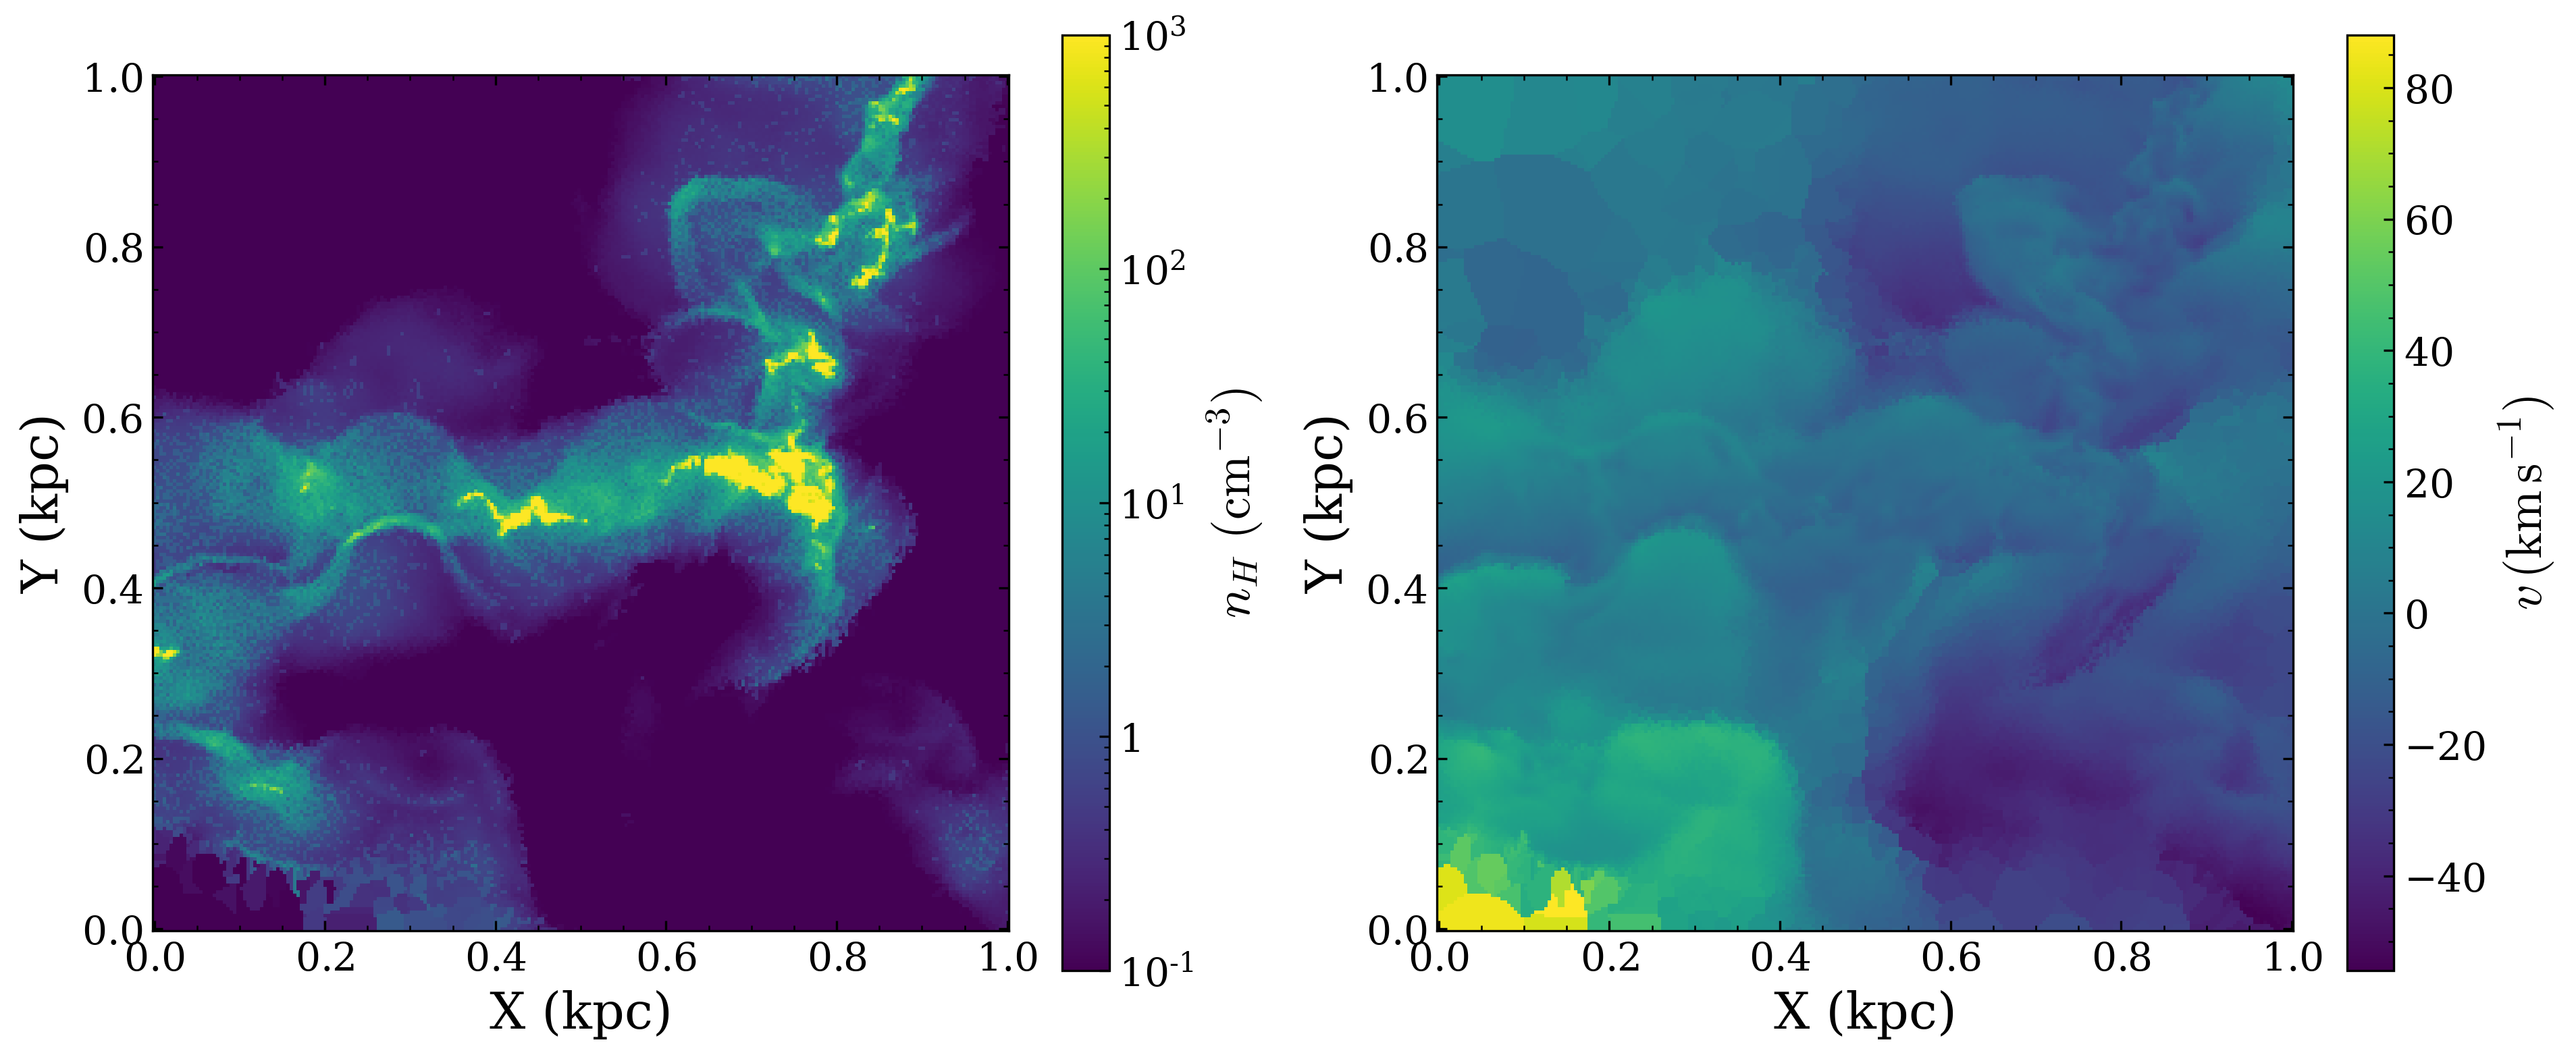

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
simField.plot_density_slice(index=128, axis=2, ax=ax[0])
simField.plot_velocity_slice(component=0, index=128, axis=2, ax=ax[1])
plt.show()

In [7]:
from utils_folding import check_conservation
check_conservation(simParticles, simField)

Total mass of particles: 0.00126
Total mass after interpolation: 3.975e+00
Total momentum of particles: [ 3.32786539e-17 -3.49623437e-16  4.52146187e-18]
Total momentum after interpolation: [-23.7154199    6.237815    -0.09684729]
Total kinetic energy of particles: 0.305
Total kinetic energy after interpolation: 2.456e+02


Testing